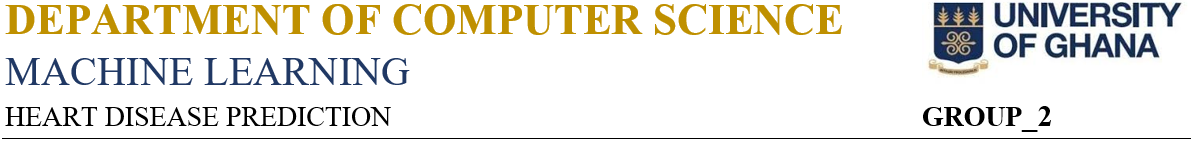

# <center>TEAM MEMBERS<center>
    
    

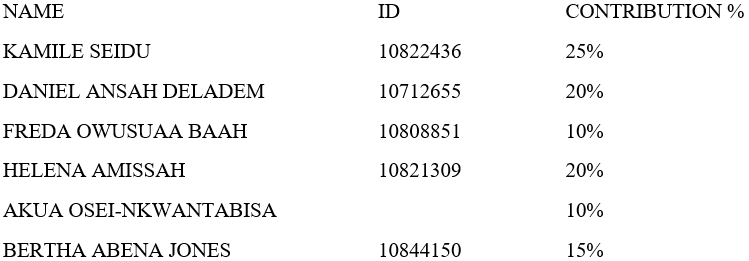

## INTRODUCTION

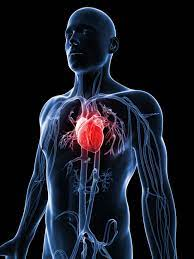
The term "heart disease" refers to a variety of diseases and ailments that affect the heart and circulatory system. Cardiovascular illnesses are another name for them. It is one of the leading causes of disability all around the world. Because the heart is one of the most important organs in the body, illnesses of the heart can impact other organs and parts of the body. Heart disorders come in a variety of shapes and sizes. The most frequent ones involve coronary artery narrowing or blockage, heart valve malfunction, heart enlargement, and a variety of other problems that contribute to heart failure and heart attacks.
According to the Centers for Disease Control and Prevention (CDC), heart disease is one of the major causes of mortality in the World. High blood pressure, high cholesterol, and smoking are three important risk factors for heart disease that affect over half of all Americans (47 percent). Diabetic status, obesity (high BMI), lack of physical exercise, and excessive alcohol use are all important indicators. In healthcare, detecting and avoiding the variables that have the greatest influence on heart disease is critical. As a result of computational advancements, machine learning methods may be used to find "patterns" in data that can be used to forecast a patient's status.
### OBJECTIVES OF THE NOTEBOOK
- This notebook aims at predicting heart diseases base on the data set given. We will be comparing models to see which one performs better than the other. We will be using some common Python libraries, such as pandas, numpy, matplotlib and Seaborn.

## DATASET CURATION <br>
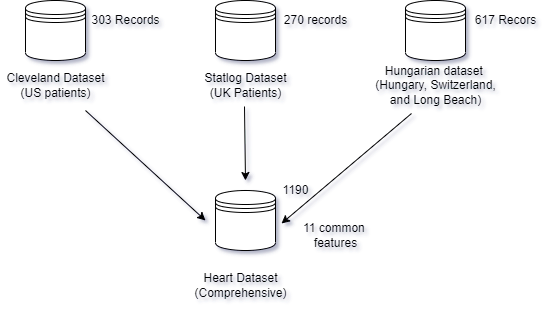

##  DATA DISCRIPTION <br>

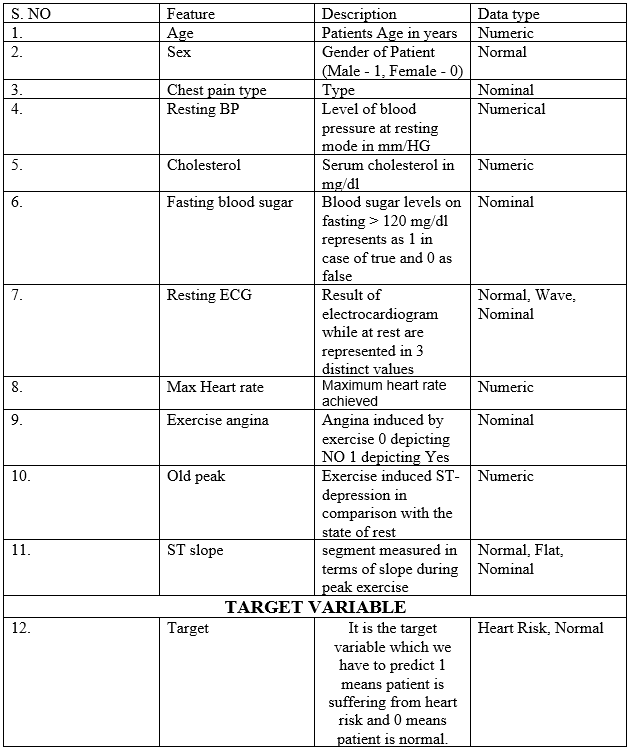

## ST SEGEMENT DEPRESSION <BR>
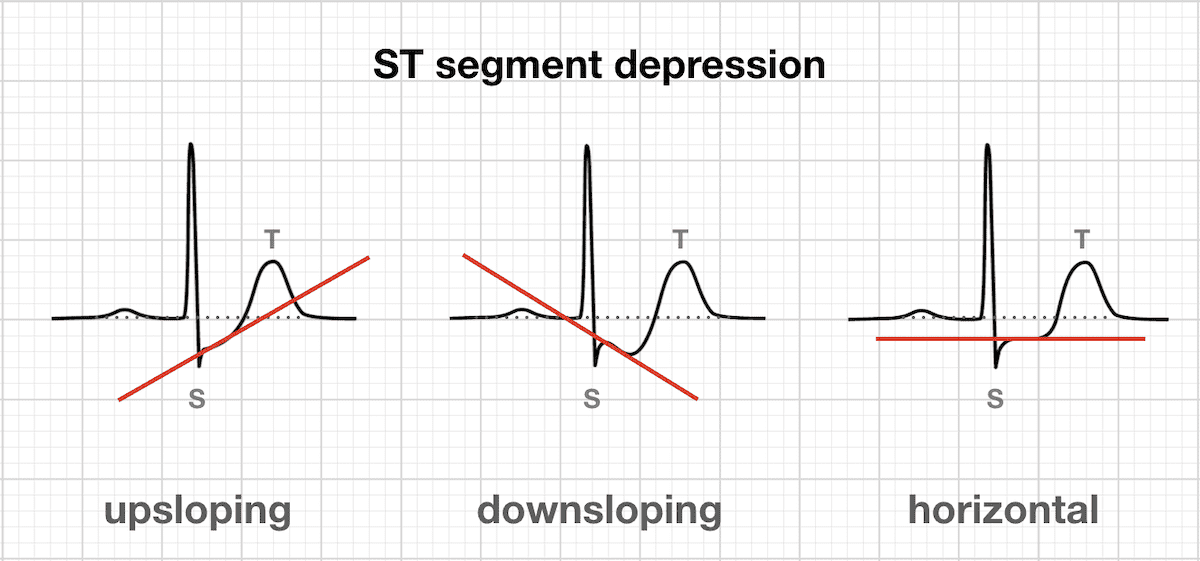
<BR>

## IMPORTING LIBRARIES

In [44]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats

## LOADING DATASET

In [45]:
dt = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

Let's see some of the sample entries of dataset

In [46]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Some of the characteristics should be nominal and encoded as their category type, as seen in the preceding dataset entries. In the following phase, we'll assign features to their appropriate categories based on the dataset's description.

## DATA CLEANING AND PROCESSING

We will update the names of columns in this phase since some of them have strange naming patterns, and then we will encode the features into categorical variables.

In [47]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [48]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [49]:
dt['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [50]:
dt['rest_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [51]:
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [52]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
#checking distribution
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [53]:
# checking the top 5 entries of dataset after feature encoding
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


As can be seen, features are correctly encoded to their categories. Following that, we'll see whether there's any missing data.

In [54]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

So, the dataset has no missing records, which is fantastic. Then, by doing extensive EDA on the dataset, we'll be able to learn more about it.

# EXPLORATORY DATA ANALYSIS (EDA)

In [55]:
# first checking the shape of the dataset
dt.shape

(1189, 12)

There are 1189 records in all, with 11 characteristics and one target variable. Let's have a look at the summary of numerical and category characteristics.

In [56]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


As can be seen from the previous description, resting blood pressure and cholestrol both exhibit some outliers, with a minimum value of 0 and a high value of 603 for cholestrol.

In [57]:
# summary statistics of categorical columns
dt.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


## Distribution of Heart disease (target variable)

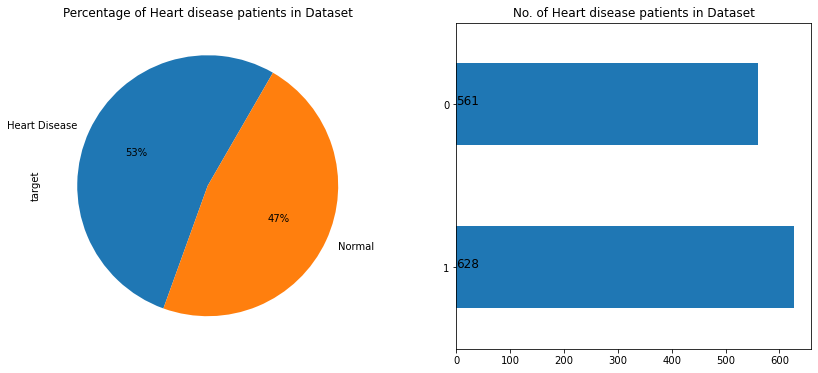

In [58]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced, including 629 individuals with cardiac disease and 561 healthy people.

### Checking Gender & Agewise Distribution

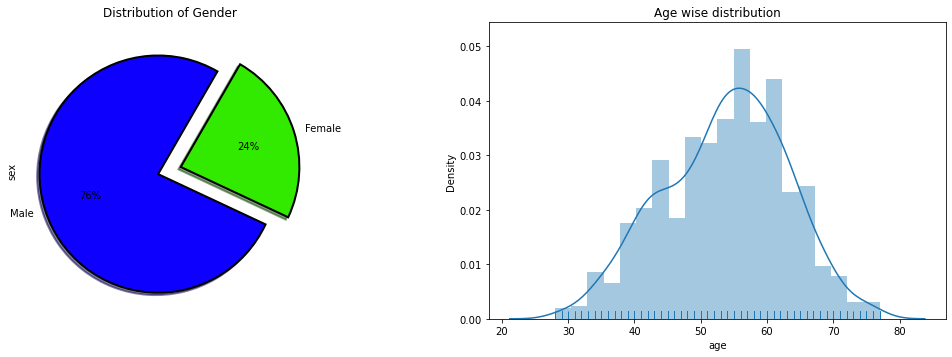

In [59]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As can be seen from the accompanying graph, males make up a far greater percentage of this dataset than females, despite the fact that the average age of the patients is about 55.

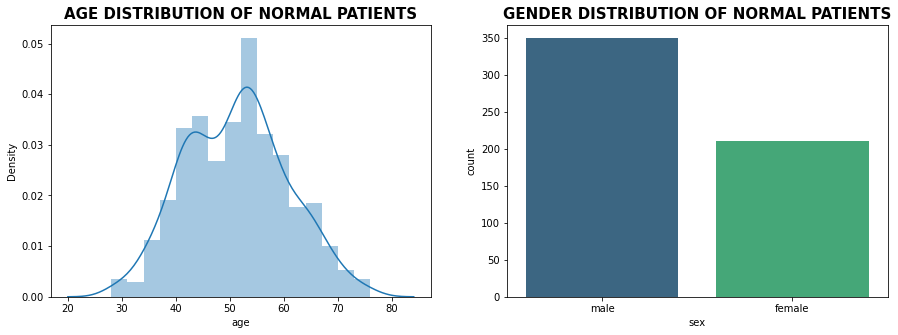

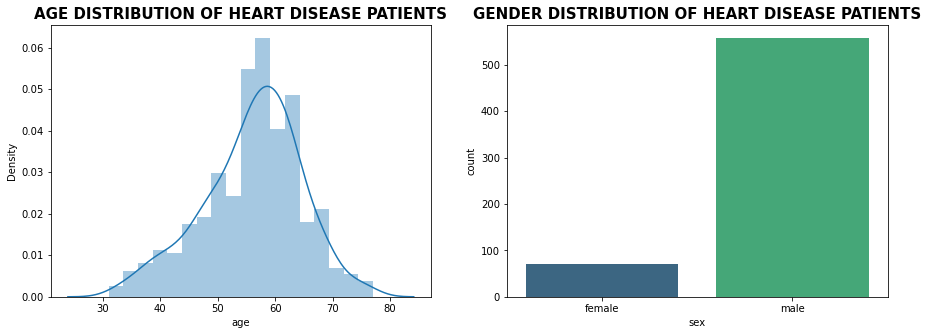

In [60]:
# creating separate df for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

As can be seen from the graph above, there are more patients with heart disease than females, with a mean age of 58 to 60 years for heart disease patients.

### Distribution of Chest Pain Type

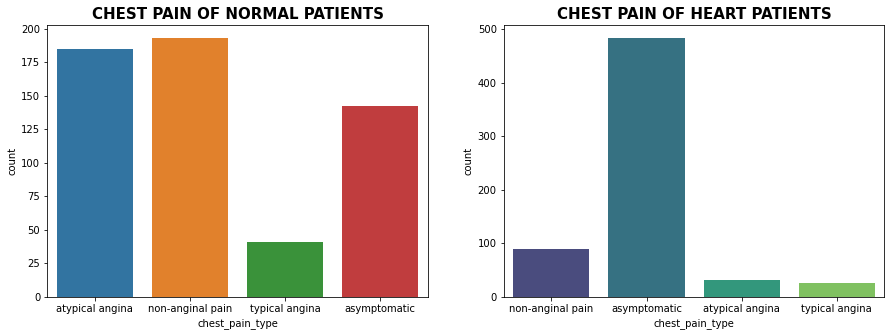

In [61]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [62]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


**76 %** of heart disease patients with chest discomfort are asymptomatic, as seen in the graph above.

Asymptomatic heart attacks, also known as **silent myocardial infarction (SMI)**, account for 45-50 percent of cardiac morbidity and even premature deaths in India each year. Males are twice as likely as females to acquire SMI among middle-aged persons. Because the symptoms of SMI are so minor compared to those of a heart attack, it is known as the "silent killer." Unlike the signs of a typical heart attack, which include severe chest pain, stabbing pain in the arms, neck, and jaw, rapid shortness of breath, perspiration, and dizziness, the symptoms of SMI are transient and are frequently misdiagnosed as ordinary discomfort.
Asymptomatic heart attacks, also known as **silent myocardial infarction (SMI)**, account for 45-50 percent of cardiac morbidity and even premature deaths in India each year. Males are twice as likely as females to acquire SMI among middle-aged persons. Because the symptoms of SMI are so minor compared to those of a heart attack, it is known as the "silent killer." Unlike the signs of a typical heart attack, which include severe chest pain, stabbing pain in the arms, neck, and jaw, rapid shortness of breath, perspiration, and dizziness, the symptoms of SMI are transient and are frequently misdiagnosed as ordinary discomfort.
[reference](https://www.maxhealthcare.in/blogs/cardiology/rise-cases-asymptomatic-heart-attacks-amongst-middle-aged-people)

### Distribution of Rest ECG


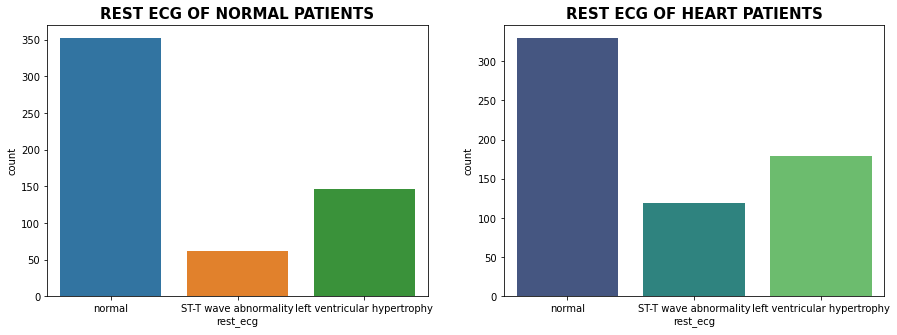

In [63]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [64]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.950000
left ventricular hypertrophy,26.020000,28.500000
normal,62.920000,52.550000


![](https://i.ibb.co/R3V4tWC/heart1.png)
An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 52% heart disease patients have normal ECG

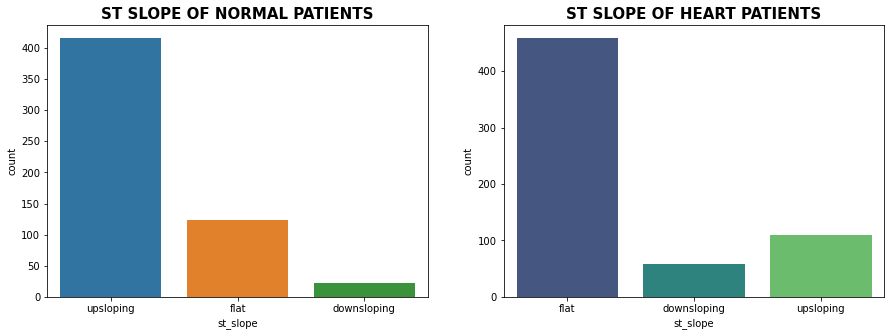

In [65]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [66]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000


In most research publications, the ST segment /heart rate slope (ST/HR slope) has been advocated as a more reliable ECG criteria for identifying severe coronary artery disease (CAD).

As can be seen from the plot above, upsloping is a favorable indicator, as 74 percent of normal individuals have it, but 72.97 percent of cardiac patients have it.

### Distribution of Numerical features

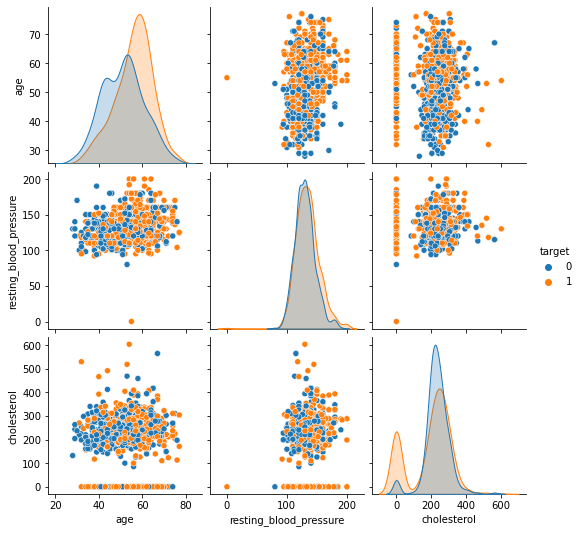

In [67]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

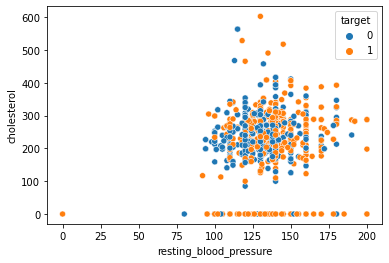

In [68]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

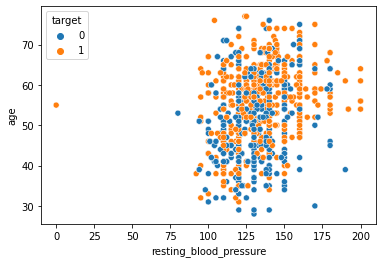

In [69]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

## OUTLIER DETECTION AND REMOOVAL

### Detecting outlier using z-score
![](https://i.ibb.co/bgRRWrp/outlier.jpg)
![](https://i.ibb.co/jDHP7Sj/Z-score-formula.jpg)

In [70]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [71]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [72]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466266                0.428136     0.775228                 1.264301
1     0.503599                1.517370     0.299516                 0.637259
2     1.787155                0.116481     0.716067                 1.635766
3     0.610562                0.319212     0.035725                 1.243865
4     0.031216                0.972753     0.151616                 0.695204
...        ...                     ...          ...                      ...
1185  0.931451                1.205715     0.528727                 0.303303
1186  1.528698                0.645983     0.171336                 0.049408
1187  0.352105                0.116481     0.782658                 0.969535
1188  0.352105                0.116481     0.252646                 1.342681
1189  1.680192                0.319212     0.348816                 1.303491

[1189 rows x 4 columns]


from these points it is diffciult to say which points are outliers so we will now define threshold

In [73]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[30][2] have a Z-score higher than 3. There are total 17 data points which are outliers.

In [74]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [75]:
# checking shape of dataset after outlier removal
dt.shape

(1172, 12)

Excellent!! Outliers have been eliminated from all 17 data points.

Before partitioning the dataset into train and test, categorical variables are encoded as dummy variables, and feature and target variables are separated.

In [76]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [77]:
# checking the shape of dataset
dt.shape

(1172, 16)

In [78]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

## Checking Correlation 


<AxesSubplot:title={'center':'Correlation with Diabetes'}>

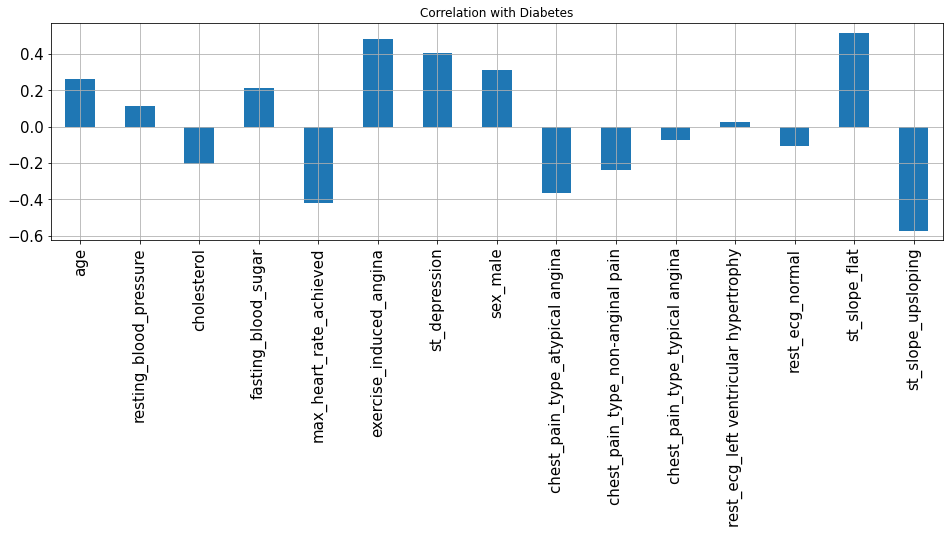

In [79]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


##  TRAIN TEST SPLIT <a id='data-train'></a>

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [81]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    491
0    446
Name: target, dtype: int64
Distribution of traget variable in test set
1    123
0    112
Name: target, dtype: int64


In [82]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


### feature normalization
In this step we will normalize all the numeric feature in the range of 0 to 1

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,1,0,0,0,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,1
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,1,0,0,0,0,1,1,0
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,1,0,0,0,0,1,1,0
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,1,0,0,0,0,1,1,0


In [84]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,1,1,0,0,1,0,1,0
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,1,1,0,0,0,1,0,1
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,0,0,0,0,1,0,1,0
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,1,0,0,0,1,0,1,0
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,1,0,0,0,1,0,1,0


## CROSS VALIDATION

In this stage, we'll create several baseline models and use 10-fold cross validation to filter the best baseline models for inclusion in the stacked ensemble method's level 0 level.

In [152]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

## MODEL BUILDING

### Random Forest Classifier (criterion = 'entropy')

In [95]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [96]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [98]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

### XGBoost (n_estimators=500)

In [99]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

[11:44:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Support Vector Classifier (kernel='linear')

In [100]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [102]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [103]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### decision Tree Classifier (CART)

In [104]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### gradient boosting machine 

In [105]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

##  MODEL EVALUATION  <a id='model-eval'></a>

 We'll start by deciding the assessment criteria we'll use to assess our model in this stage. **Sensitivity, specificity, precision, F1-measure, geometric mean and mathew correlation coefficient, and lastly the ROC AUC curve** are the most relevant assessment metrics for this issue domain.

### Mathew Correlation coefficient (MCC)

The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

![](https://i.ibb.co/mH6MmG4/mcc.jpg)

### Log Loss
Logarithmic loss  measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.

The graph below shows the range of possible log loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!

![](https://i.ibb.co/6BdDczW/log-loss.jpg)

### F1 Score

 F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

**F1 Score = 2*(Recall * Precision) / (Recall + Precision)**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.897872,0.861314,0.95935,0.830357,0.907692,0.894853,3.527429,0.799934


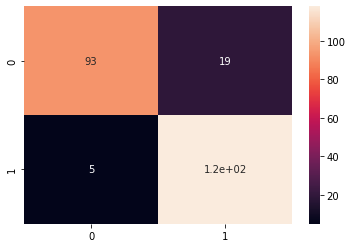

In [106]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

## Comparison with other Models

In [154]:
data = {        'MLP': y_pred_mlp, 
                #'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.897872,0.866667,0.951220,0.839286,0.906977,0.895253,3.527426,0.798545
1,Random Forest Entropy,0.902128,0.867647,0.959350,0.839286,0.911197,0.899318,3.380452,0.807836
2,MLP2,0.829787,0.816794,0.869919,0.785714,0.842520,0.827816,5.879022,0.659280
3,EXtra tree classifier,0.902128,0.884615,0.934959,0.866071,0.909091,0.900515,3.380442,0.804719
4,XGB2,0.885106,0.858209,0.934959,0.830357,0.894942,0.882658,3.968350,0.772128
5,SVC2,0.808511,0.778571,0.886179,0.723214,0.828897,0.804697,6.613914,0.620202
6,SGD2,0.791489,0.764286,0.869919,0.705357,0.813688,0.787638,7.201815,0.585480
7,Adaboost,0.825532,0.825397,0.845528,0.803571,0.835341,0.824550,6.025989,0.650092
8,CART,0.889362,0.870229,0.926829,0.848214,0.897638,0.887522,3.821369,0.779355
9,GBM,0.851064,0.833333,0.894309,0.803571,0.862745,0.848940,5.144148,0.702485


### ROC AUC Curve

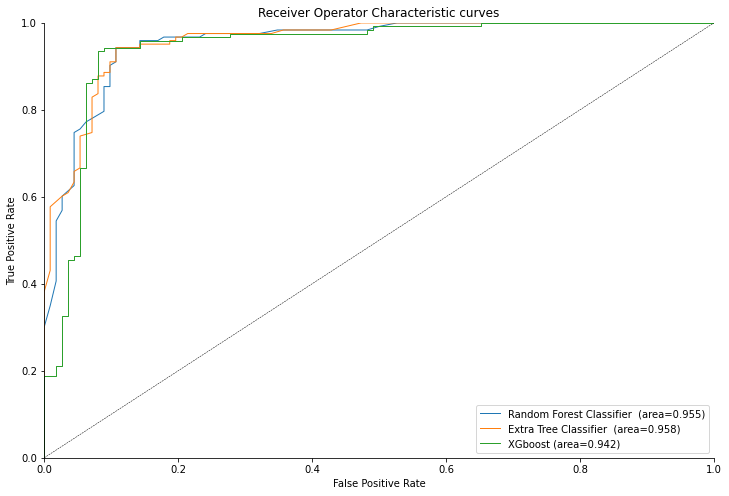

In [110]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

As we can see highest average area under the curve (AUC) of 0.950 is attained by Extra Tree Classifier

## Precision Recall curve


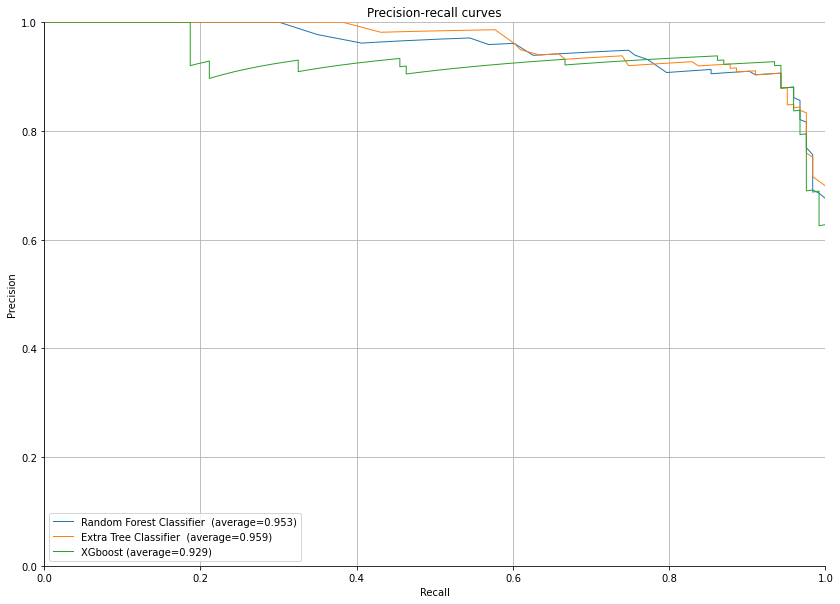

In [111]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

## FEATURE SELECTION

In [112]:
num_feats=11

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

11 selected features


In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

11 selected features


In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 15 features.
11 selected features


In [115]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

7 selected features


In [116]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


In [118]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

6 selected features


In [119]:
# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,st_depression,True,True,True,True,True,True,6
2,st_slope_flat,True,True,True,True,True,False,5
3,max_heart_rate_achieved,True,True,True,False,True,True,5
4,exercise_induced_angina,True,True,True,False,True,True,5
5,cholesterol,True,False,True,True,True,True,5
6,age,True,True,True,False,True,True,5
7,st_slope_upsloping,True,True,True,False,True,False,4
8,sex_male,True,True,True,True,False,False,4
9,chest_pain_type_non-anginal pain,True,True,True,True,False,False,4
10,chest_pain_type_atypical angina,True,True,True,True,False,False,4


In [120]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target','resting_blood_pressure','sex_male','chest_pain_type_non-anginal pain','chest_pain_type_atypical angina'],axis=1)
y = dt['target']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.000000,1,0.303704,1,0.454545,0,0,1,0,0
253,0.673469,0.594705,0,0.355556,1,0.194805,0,0,0,0,1
273,0.551020,0.409369,0,0.466667,1,0.584416,0,0,1,1,0
111,0.591837,0.519348,0,0.185185,1,0.584416,0,0,1,1,0
50,0.448980,0.474542,0,0.400000,1,0.454545,0,0,1,1,0


In [123]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.572301,0,0.266667,0,0.376623,0,1,0,1,0
182,0.469388,0.456212,0,0.614815,0,0.194805,0,0,1,0,1
785,0.346939,0.480652,0,0.629630,1,0.220779,0,1,0,1,0
924,0.591837,0.562118,0,0.333333,1,0.272727,0,1,0,1,0
780,0.612245,0.527495,0,0.466667,1,0.584416,0,1,0,1,0


## Soft voting

In [ ]:
import xgboost as xgb
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

## MODEL EVALUATION

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.897872,0.866667,0.95122,0.839286,0.906977,0.895253,3.527426,0.798545


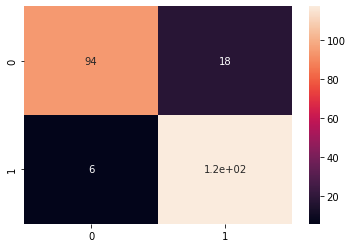

In [126]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [127]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [128]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [130]:
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,y_train)
y_pred_et1000 = et_1000.predict(X_test)

In [ ]:
xgb = xgb.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [132]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)


In [133]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [134]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [135]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [136]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [138]:
data = {
             'Random Forest Entropy': y_pred_rfe, 
                'MLP2': y_pred_mlp, 
                ##'KNN2': y_pred_knn, 
                'EXtra tree classifier': y_pred_et1000,
                'XGB2': y_pred_xgb, 
                'SVC2': y_pred_svc, 
                'SGD2': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.897872,0.866667,0.951220,0.839286,0.906977,0.895253,3.527426,0.798545
1,Random Forest Entropy,0.902128,0.867647,0.959350,0.839286,0.911197,0.899318,3.380452,0.807836
2,MLP2,0.829787,0.816794,0.869919,0.785714,0.842520,0.827816,5.879022,0.659280
3,EXtra tree classifier,0.902128,0.884615,0.934959,0.866071,0.909091,0.900515,3.380442,0.804719
4,XGB2,0.885106,0.858209,0.934959,0.830357,0.894942,0.882658,3.968350,0.772128
5,SVC2,0.808511,0.778571,0.886179,0.723214,0.828897,0.804697,6.613914,0.620202
6,SGD2,0.791489,0.764286,0.869919,0.705357,0.813688,0.787638,7.201815,0.585480
7,Adaboost,0.825532,0.825397,0.845528,0.803571,0.835341,0.824550,6.025989,0.650092
8,CART,0.889362,0.870229,0.926829,0.848214,0.897638,0.887522,3.821369,0.779355
9,GBM,0.851064,0.833333,0.894309,0.803571,0.862745,0.848940,5.144148,0.702485


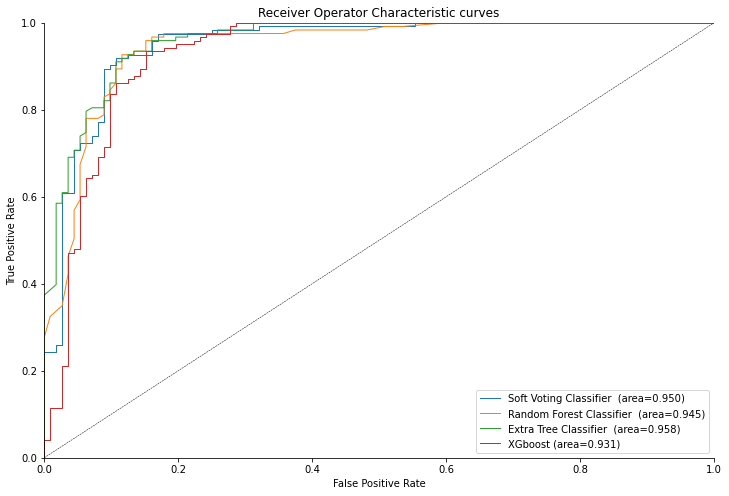

In [139]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,eclf1.predict_proba(X_test),label='Soft Voting Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

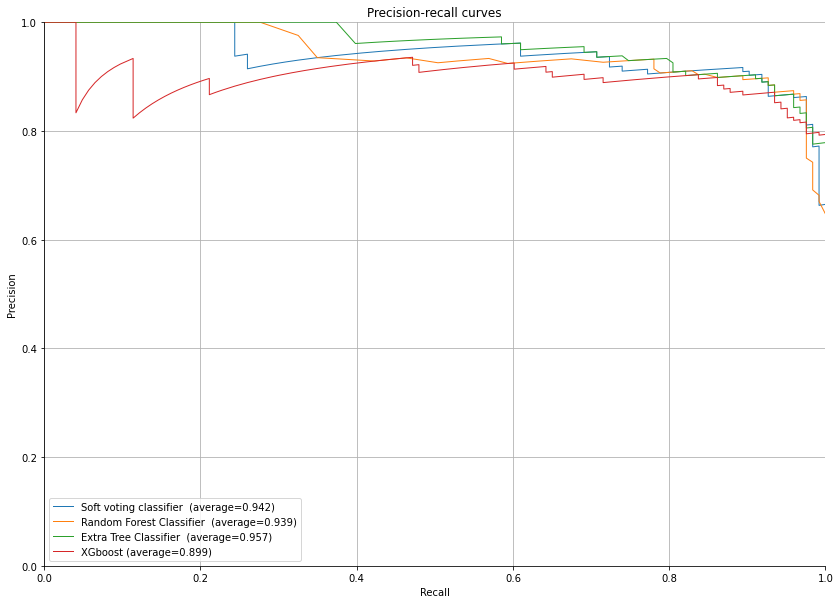

In [140]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,eclf1.predict_proba(X_test),label='Soft voting classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

<AxesSubplot:>

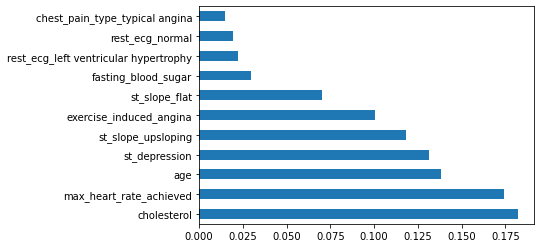

In [141]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

##  CONCLUSION  <a id='data-conc'></a>
- As we have seen, stacked ensemble of power machine learning algorithms resulted in higher performance than any individual machine learning model.
- We have also interpreted second best performing algo i.e., random forest algorithm

#### The top 5 most contribution features are:
1. **Max heart Rate achieved**<br>
2. **Cholestrol**<br>
3. **st_depression**<br>
4. **Age**<br>
5. **exercise_induced_angina**<br>


# GITHUB_REPOSITORY_LINK

    https://github.com/KamileSeidu/Group_2_Heart_Disease_Prediction